In [25]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random lat and long combos
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# add the lats and lngs to a list
coordinates = list(lats_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# import the requests library.
import requests

# import the API key.
from config import weather_api_key

In [8]:
# starting url for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# import the datetime module
from datetime import datetime

In [10]:
# create a new list to hold the weather data
city_data = []
# print the beginning
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# loop through cities list
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    # run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   
        

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | iquique
Processing Record 3 of Set 1 | maltahohe
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | tukrah
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | anniston
Processing Record 8 of Set 1 | flin flon
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | chapais
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | mae ramat
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | canaries
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | burica
City not found. Skipping...
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | muisne
Processing Record 21 of Set 1 | huarmey
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | pacific grove
Processing Record 24 of Set 1

Processing Record 36 of Set 4 | ust-tsilma
Processing Record 37 of Set 4 | lorengau
Processing Record 38 of Set 4 | guider
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | yuncheng
Processing Record 42 of Set 4 | tilichiki
Processing Record 43 of Set 4 | eisenerz
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | port shepstone
Processing Record 47 of Set 4 | auki
Processing Record 48 of Set 4 | houma
Processing Record 49 of Set 4 | puerto madero
Processing Record 50 of Set 4 | hilo
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | morwell
Processing Record 3 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | san juan bautista
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | sur
Processing Record 8 of S

Processing Record 29 of Set 8 | bam
Processing Record 30 of Set 8 | miles city
Processing Record 31 of Set 8 | kiama
Processing Record 32 of Set 8 | bulalacao
Processing Record 33 of Set 8 | san cristobal
Processing Record 34 of Set 8 | almaznyy
Processing Record 35 of Set 8 | arkansas city
Processing Record 36 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 37 of Set 8 | cozumel
Processing Record 38 of Set 8 | timizart
Processing Record 39 of Set 8 | borogontsy
Processing Record 40 of Set 8 | pierre
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | dunmanway
Processing Record 43 of Set 8 | hervey bay
Processing Record 44 of Set 8 | ngaoundere
Processing Record 45 of Set 8 | kampene
Processing Record 46 of Set 8 | flinders
Processing Record 47 of Set 8 | carroll
Processing Record 48 of Set 8 | toliary
City not found. Skipping...
Processing Record 49 of Set 8 | sunyani
Processing Record 50 of Set 8 | acari
Processing Record 1 of Set 9 | luderi

Processing Record 17 of Set 12 | macau
Processing Record 18 of Set 12 | kalmunai
Processing Record 19 of Set 12 | awbari
Processing Record 20 of Set 12 | fortuna
Processing Record 21 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 22 of Set 12 | toora-khem
Processing Record 23 of Set 12 | fairbanks
Processing Record 24 of Set 12 | maxixe
Processing Record 25 of Set 12 | astoria
Processing Record 26 of Set 12 | diamantino
Processing Record 27 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 28 of Set 12 | salta
Processing Record 29 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 30 of Set 12 | gizo
Processing Record 31 of Set 12 | whakatane
Processing Record 32 of Set 12 | pangai
Processing Record 33 of Set 12 | kannangad
Processing Record 34 of Set 12 | innisfail
Processing Record 35 of Set 12 | irmo
Processing Record 36 of Set 12 | nalut
Processing Record 37 of Set 12 | raga
Processing Record 38 of Set 12 | ruatoria


In [12]:
len(city_data)

542

In [13]:
# convert the array of dictionaries to a df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,29.86,93,75,24.16,AR,2021-05-27 21:10:04
1,Iquique,-20.2208,-70.1431,64.44,74,100,3.13,CL,2021-05-27 21:11:47
2,Maltahohe,-24.8333,16.9833,59.38,34,8,6.06,NA,2021-05-27 21:11:47
3,Saint-Philippe,-21.3585,55.7679,71.19,77,51,5.35,RE,2021-05-27 21:11:48
4,Tukrah,32.5341,20.5791,70.36,65,2,4.23,LY,2021-05-27 21:11:48
5,Codrington,-38.2667,141.9667,51.69,72,100,11.79,AU,2021-05-27 21:11:48
6,Anniston,33.6598,-85.8316,85.05,65,75,5.75,US,2021-05-27 21:11:49
7,Flin Flon,54.7682,-101.8650,60.37,26,100,13.15,CA,2021-05-27 21:11:49
8,Qaanaaq,77.4840,-69.3632,37.35,80,100,5.79,GL,2021-05-27 21:09:15
9,Chapais,49.7834,-74.8492,35.38,43,100,14.56,CA,2021-05-27 21:11:49


In [14]:
# reorder columns
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-05-27 21:10:04,-54.8000,-68.3000,29.86,93,75,24.16
1,Iquique,CL,2021-05-27 21:11:47,-20.2208,-70.1431,64.44,74,100,3.13
2,Maltahohe,NA,2021-05-27 21:11:47,-24.8333,16.9833,59.38,34,8,6.06
3,Saint-Philippe,RE,2021-05-27 21:11:48,-21.3585,55.7679,71.19,77,51,5.35
4,Tukrah,LY,2021-05-27 21:11:48,32.5341,20.5791,70.36,65,2,4.23


In [15]:
# create the output file
output_data_file = "weather_data/cities.csv"
# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# extract relevant fields from df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

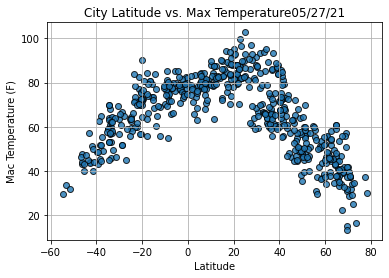

In [27]:
# Import the time module.
import time

# build the scatter plot for latitude vs max tmep
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

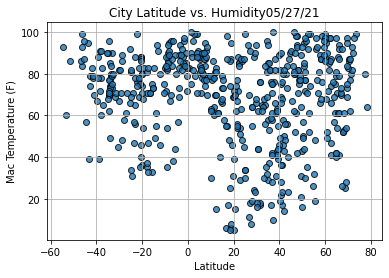

In [28]:
# build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humudity")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

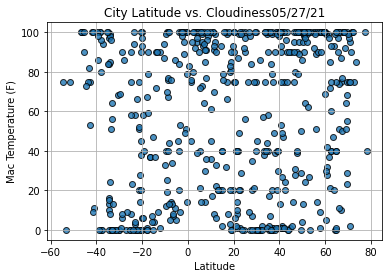

In [29]:
# build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

In [ ]:
# build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()